Nearly New Nautical is a website that allows users to advertise their used boats for sale. The
marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed
to help sellers to get more views of their boat, as well as stay on top of market trends. The
Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75%
this year.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy.stats import pearsonr
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.read_csv('/content/boat_data.csv')
df.head(2)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.0,1.5,Thermoplastic,Germany,75


In [ ]:
df.shape

(9888, 10)

In [ ]:
df[['Unit','Price']]= df.Price.str.split(expand=True)
df['Unit'] = df.Unit.replace(['CHF', 'EUR', 'DKK', 'Â£'], [1.04,1,0.13,1.18]) # Euro based
df['Price'] = df.Price.astype(int) * df.Unit

df['Area'] = df.Length * df.Width
df.drop(['Length','Width','Unit'], axis=1, inplace=True)

In [ ]:
df.describe()

,Price,Year Built,Number of views last 7 days,Area
count,9.888000e+03,9888.000000,9888.000000,9832.000000
mean,3.034104e+05,1893.192860,149.160801,47.127985
std,9.721027e+05,460.201582,151.819752,47.066213
min,3.224000e+03,0.000000,13.000000,0.128000
25%,4.300000e+04,1996.000000,70.000000,18.874500
50%,9.315000e+04,2007.000000,108.000000,34.231400
75%,2.488500e+05,2017.000000,172.000000,58.990000
max,3.100000e+07,2021.000000,3263.000000,1078.800000


## temp

In [ ]:
df.Location.value_counts()[:5]

Germany        1914
Italy          1793
France         1229
Switzerland    1112
Netherlands    1056
Name: Location, dtype: int64

In [ ]:
df.Manufacturer.value_counts()[:5]

BÃ©nÃ©teau power boats    631
Jeanneau power boats      537
Sunseeker power boats     383
Princess power boats      241
Sea Ray power boats       239
Name: Manufacturer, dtype: int64

In [ ]:
df['Boat Type'].value_counts()[:5]

Motor Yacht    2720
Sport Boat     1407
Flybridge      1194
Trawler         679
Pilothouse      613
Name: Boat Type, dtype: int64

In [ ]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Material                       1749
Location                         36
Number of views last 7 days       0
Area                             56
dtype: int64

## Is it the most expensive boats that get the most views?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


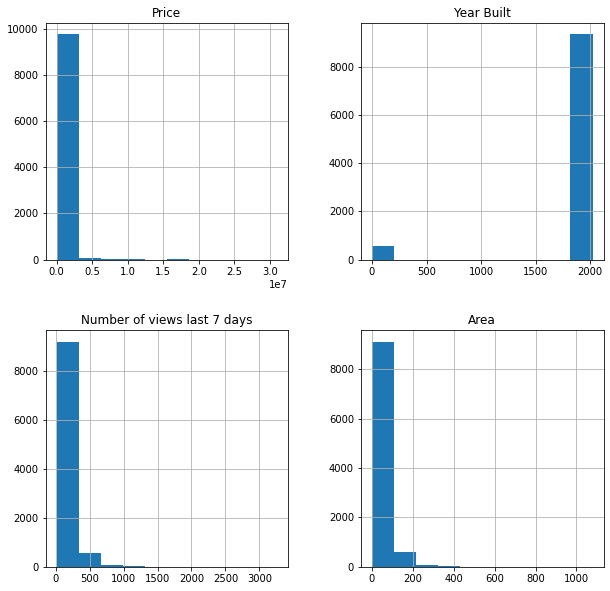

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax);

In [ ]:
def convert_type(i):
  if str(i) == 'nan':
    return np.NaN

  if 'new' in i:
    return 'new'
  elif 'Used' in i:
    return 'used'
  else:
    return 'other'

df['Type'] = df['Type'].apply(convert_type)

In [ ]:
new_df = df[df.Type == 'new'].drop('Type', axis=1)
used_df = df[df.Type == 'used'].drop('Type', axis=1)

In [ ]:
new_df['Pricing'] = pd.cut(df.Price, bins=[0, 4e4, 7.5e4, 4e7], labels=['Cheap','Average','Expensive'])
used_df['Pricing'] = pd.cut(df.Price, bins=[0, 1e4, 3e4, 4e7], labels=['Cheap','Average','Expensive'])

In [ ]:
merge_df = pd.concat([new_df, used_df], axis=0, ignore_index=True)

In [ ]:
new_df['Pricing'].value_counts()

Expensive    1017
Cheap         723
Average       616
Name: Pricing, dtype: int64

In [ ]:
used_df['Pricing'].value_counts()

Expensive    6246
Average       903
Cheap         178
Name: Pricing, dtype: int64

In [ ]:
used_df[used_df['Number of views last 7 days']>250].shape[0] / used_df.shape[0]
new_df[new_df['Number of views last 7 days']>250].shape[0] / new_df.shape[0]

0.0865874363327674

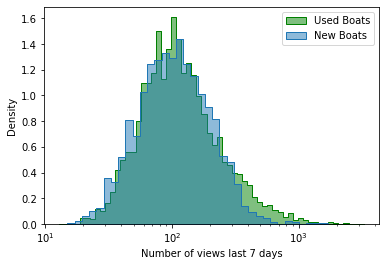

In [ ]:
plt.xscale('log')
sns.histplot(used_df['Number of views last 7 days'], label='Used Boats',element="step", color='g',stat="density",alpha=0.5)
sns.histplot(new_df['Number of views last 7 days'],label='New Boats',element="step",stat="density",alpha=0.5)
plt.legend()

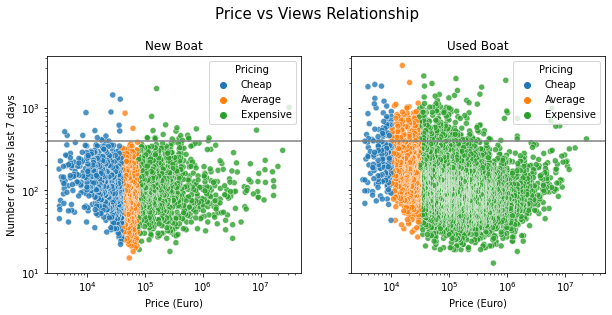

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(10,4))
plt.suptitle('Price vs Views Relationship', y=1.05, fontsize=15)
sns.scatterplot(x='Price', y='Number of views last 7 days',
                    hue='Pricing' , data=new_df, alpha=0.8, ax=ax1)
ax1.set_title("New Boat")
ax1.set_xlabel('Price (Euro)')
ax1.set_xscale('log')
ax1.set_yscale('log')

sns.scatterplot(x='Price', y='Number of views last 7 days',
                    hue='Pricing' , data=used_df, alpha=0.8, ax=ax2)
ax2.set_title("Used Boat")
ax2.set_xlabel('Price (Euro)')
ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.axhline(4e2, color='gray')
ax2.axhline(4e2, color='gray')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


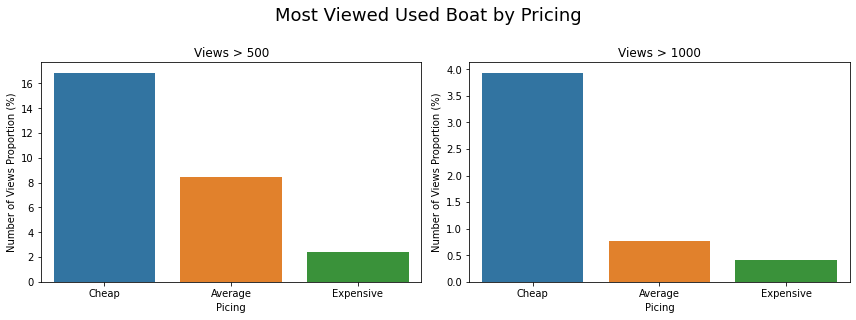

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [500,1000]

inc = 0
for j in ax:
    tmp = used_df[used_df['Number of views last 7 days'] > views[inc]]['Pricing']\
          .value_counts().sort_index()\
          /used_df['Pricing'].value_counts().sort_index()*100
    sns.barplot(tmp.index, tmp, ax=j)
    plt.suptitle('Most Viewed Used Boat by Pricing', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Pricing');
    inc+=1
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


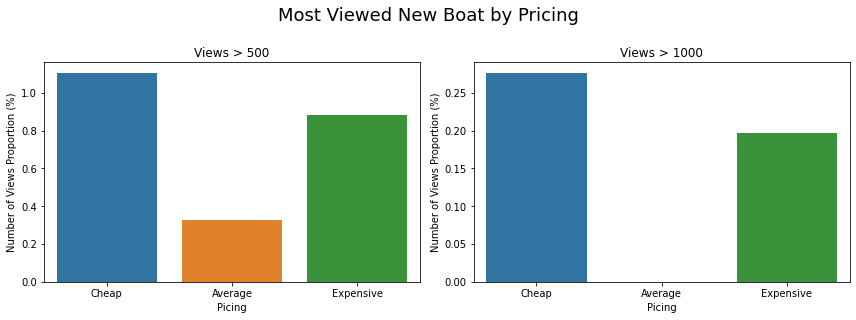

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [500,1000]

inc = 0
for j in ax:
    tmp = new_df[new_df['Number of views last 7 days'] > views[inc]]['Pricing']\
          .value_counts().sort_index()\
          /new_df['Pricing'].value_counts().sort_index()*100
    sns.barplot(tmp.index, tmp, ax=j)
    plt.suptitle('Most Viewed New Boat by Pricing', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Pricing');
    inc+=1
plt.tight_layout()

Cheap 2x average

Cheap 3.5x expensive

## Are there common features among the most viewed boats?

In [ ]:
pt = PowerTransformer(method='box-cox')
pearsonr(pt.fit_transform(used_df['Price'].values.reshape(-1,1)).flatten(), 
         pt.fit_transform(used_df['Number of views last 7 days'].values.reshape(-1,1)).flatten())

(-0.35050185220313335, 8.504359176774512e-211)

In [ ]:
pt = PowerTransformer(method='box-cox')
pearsonr(pt.fit_transform(new_df['Price'].values.reshape(-1,1)).flatten(), 
         pt.fit_transform(new_df['Number of views last 7 days'].values.reshape(-1,1)).flatten())

(-0.09202888142933202, 7.673974028639013e-06)

In [ ]:
imp = IterativeImputer(random_state=0, max_iter=100, min_value=0)

used_df['Area']=pd.DataFrame(imp.fit_transform(used_df.select_dtypes('number')), 
            columns=used_df.select_dtypes('number').columns)['Area'].values

new_df['Area']=pd.DataFrame(imp.fit_transform(new_df.select_dtypes('number')), 
            columns=new_df.select_dtypes('number').columns)['Area'].values

In [ ]:
imp = IterativeImputer(random_state=0, missing_values=0 ,
                       max_iter=100, min_value=1885, max_value=2021)

used_df['Year Built']=pd.DataFrame(imp.fit_transform(used_df.select_dtypes('number')), 
            columns=used_df.select_dtypes('number').columns)['Year Built'].values.round()

new_df['Year Built']=pd.DataFrame(imp.fit_transform(new_df.select_dtypes('number')), 
            columns=new_df.select_dtypes('number').columns)['Year Built'].values.round()

In [ ]:
pt = PowerTransformer(method='box-cox')

for i in [new_df, used_df]:
  for j in i.select_dtypes('number').columns.drop('Year Built'):
    i[j] = pt.fit_transform(i[j].values.reshape(-1,1)).flatten()

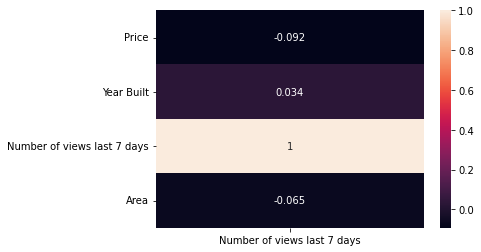

In [ ]:
sns.heatmap(new_df.corr()[['Number of views last 7 days']], annot=True)

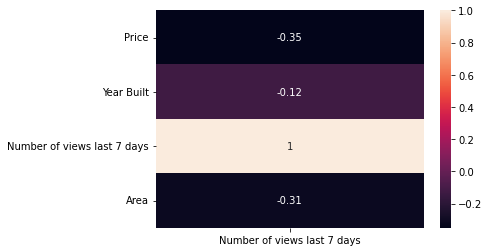

In [ ]:
sns.heatmap(used_df.corr()[['Number of views last 7 days']], annot=True)

(-0.20666274237852703, 1.0048015067116007e-68)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


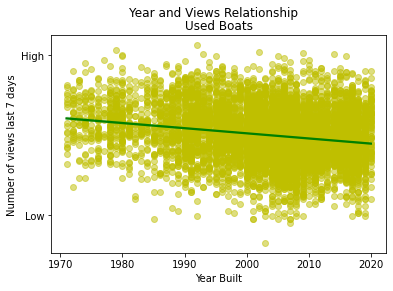

In [ ]:
plt.suptitle('Year and Views Relationship')
plt.title('Used Boats')
tmp = used_df[used_df['Year Built']>1970]
print(pearsonr(tmp['Year Built'], tmp['Number of views last 7 days']))
plt.yticks([-3,3], labels=["Low","High"])
sns.regplot(tmp['Year Built'], tmp['Number of views last 7 days'], scatter_kws={'alpha':0.5, 'color':'y'}, 
            line_kws={"color": "g"})

(0.07162004901809511, 0.0005956619511780499)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


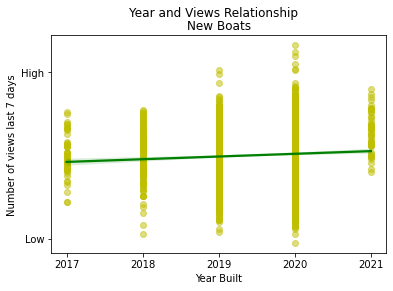

In [ ]:
plt.suptitle('Year and Views Relationship')
plt.title('New Boats')
tmp = new_df[new_df['Year Built']>2016]
print(pearsonr(tmp['Year Built'], tmp['Number of views last 7 days']))
plt.xticks(range(2017,2022))
plt.yticks([-3,3], labels=["Low","High"])
sns.regplot(tmp['Year Built'], tmp['Number of views last 7 days'], scatter_kws={'alpha':0.5, 'color':'y'}, 
            line_kws={"color": "g"})

In [ ]:
np.quantile(new_df['Number of views last 7 days'], 0)

-3.157414404014221

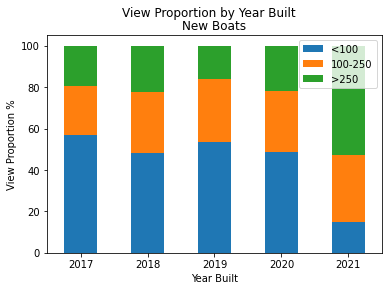

In [ ]:
new_df['View'] = pd.cut(new_df['Number of views last 7 days'], [-4, 0.016, 0.87, 4],labels=['<100','100-250','>250'])
a = new_df[new_df['Year Built'] > 2016].groupby(['Year Built','View'])['Number of views last 7 days'].count().reset_index()
b =  pd.DataFrame(new_df[['Year Built']].value_counts()).reset_index()
c = pd.merge(a,b, on = ['Year Built']).set_index(['Year Built','View'])
d = (c['Number of views last 7 days']/c[0]*100).reset_index()
d['Year Built'] = d['Year Built'].astype(int)
e = pd.pivot_table(d, values=0, columns='View', index='Year Built')
e.plot(kind='bar', stacked=True)
plt.suptitle("View Proportion by Year Built")
plt.title('New Boats')
plt.legend(loc=1)
plt.ylabel('View Proportion %')
plt.xticks(rotation=0);

(-0.0859554314562333, 3.2340937164348395e-05)
(-0.3128042860478205, 4.878336149431972e-166)


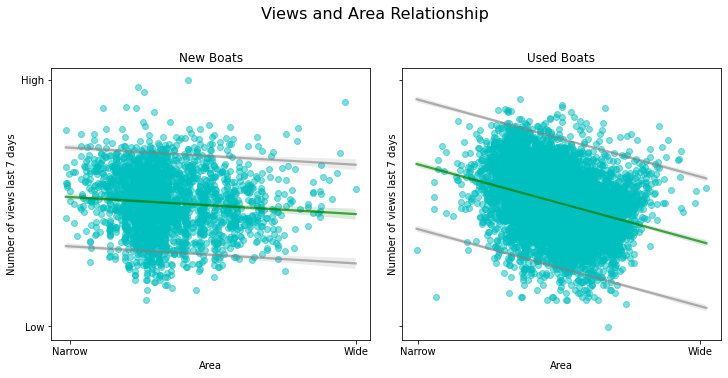

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,5), sharey= True)
plt.suptitle("Views and Area Relationship",fontsize=16, y=1.05)

tmp=new_df[new_df['Area'].between(np.quantile(new_df['Area'],0.01), np.quantile(new_df['Area'],1))]
print(pearsonr(tmp['Area'], tmp['Number of views last 7 days']))
ax[0].set_yticks([-4,4])
ax[0].set_yticklabels(['Low','High'])
ax[0].set_xticks([-2,4])
ax[0].set_xticklabels(["Narrow","Wide"])
ax[0].set_title('New Boats')
sns.regplot(y='Number of views last 7 days',x='Area', data=tmp, ax=ax[0],scatter_kws={'alpha':0.5, 'color':'c'}, 
            line_kws={"color": "g", 'alpha':0.7})
sns.regplot(y=tmp['Number of views last 7 days']-1.6,x=tmp['Area'],ax=ax[0],
            line_kws={"color": "gray", 'alpha':0.6}, scatter=False)
sns.regplot(y=tmp['Number of views last 7 days']+1.6,x=tmp['Area'],ax=ax[0],
            line_kws={"color": "gray", 'alpha':0.6}, scatter=False)

tmp=used_df
# [used_df['Area'].between(np.quantile(used_df['Area'],0.01), np.quantile(used_df['Area'],0.99))]
print(pearsonr(tmp['Area'], tmp['Number of views last 7 days']))
ax[1].set_xticks([-4,4])
ax[1].set_xticklabels(["Narrow","Wide"])
ax[1].set_title('Used Boats')
sns.regplot(y=tmp['Number of views last 7 days'],x=tmp['Area'], scatter_kws={'alpha':0.5, 'color':'c'}, 
            line_kws={"color": "g", 'alpha':0.7})
sns.regplot(y=tmp['Number of views last 7 days']-2.1,x=tmp['Area'], 
            line_kws={"color": "gray", 'alpha':0.6}, scatter=False)
sns.regplot(y=tmp['Number of views last 7 days']+2.1,x=tmp['Area'], 
            line_kws={"color": "gray", 'alpha':0.6}, scatter=False)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


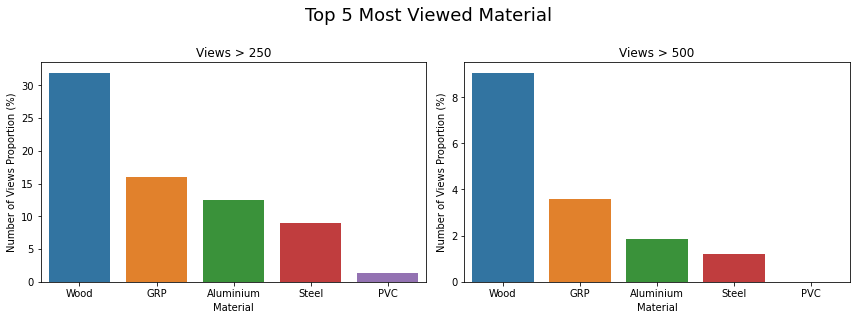

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [250,500]

inc = 0
for j in ax:
    a = pd.DataFrame(merge_df[merge_df['Number of views last 7 days']>views[inc]]['Material'].value_counts().reset_index())
    b = pd.DataFrame(merge_df['Material'].value_counts().reset_index()).loc[:4]
    c = pd.merge(b,a,how='left', on='index')
    c['div'] = c['Material_y']/c['Material_x']*100
    c = c.sort_values(by='div', ascending=False)
    sns.barplot(c['index'], c['div'], ax=j)
    plt.suptitle('Top 5 Most Viewed Material', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Material');
    inc+=1
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


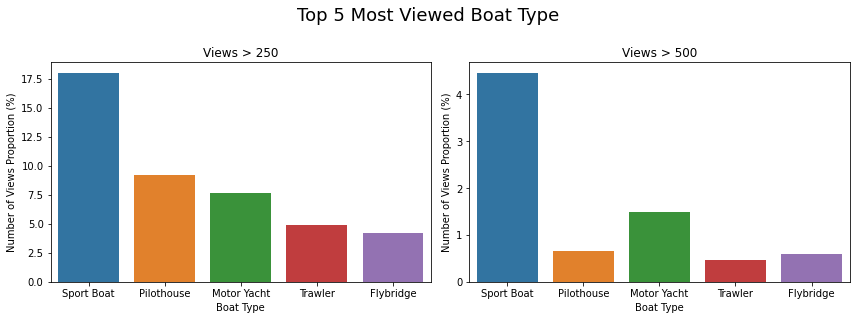

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [250,500]

inc = 0
for j in ax:
    a = pd.DataFrame(merge_df[merge_df['Number of views last 7 days']>views[inc]]['Boat Type'].value_counts().reset_index())
    b = pd.DataFrame(merge_df['Boat Type'].value_counts().reset_index()).loc[:4]
    c = pd.merge(b,a,how='left', on='index')
    c['div'] = c['Boat Type_y']/c['Boat Type_x']*100
    c = c.sort_values(by='div', ascending=False)
    sns.barplot(c['index'], c['div'], ax=j, order=['Sport Boat','Pilothouse','Motor Yacht','Trawler','Flybridge'])
    plt.suptitle('Top 5 Most Viewed Boat Type', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Boat Type');
    inc+=1
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


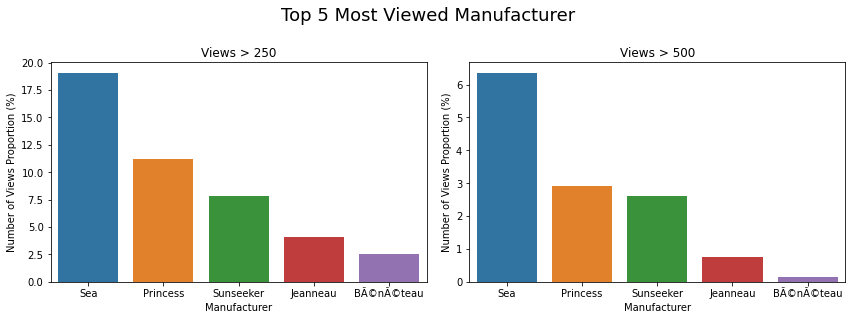

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [250,500]

inc = 0
for j in ax:
    a = pd.DataFrame(merge_df[merge_df['Number of views last 7 days']>views[inc]]['Manufacturer'].value_counts().reset_index())
    b = pd.DataFrame(merge_df['Manufacturer'].value_counts().reset_index()).loc[:4]
    c = pd.merge(b,a,how='left', on='index')
    c['div'] = c['Manufacturer_y']/c['Manufacturer_x']*100
    c = c.sort_values(by='div', ascending=False)
    c['index']= c['index'].apply(lambda x:x.split()[0])
    sns.barplot(c['index'], c['div'], ax=j)
    plt.suptitle('Top 5 Most Viewed Manufacturer', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Manufacturer');
    inc+=1
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


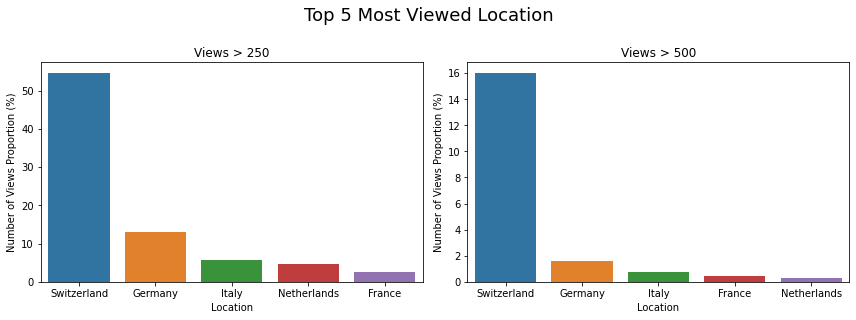

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
views = [250,500]

inc = 0
for j in ax:
    a = pd.DataFrame(merge_df[merge_df['Number of views last 7 days']>views[inc]]['Location'].value_counts().reset_index())
    b = pd.DataFrame(merge_df['Location'].value_counts().reset_index()).loc[:4]
    c = pd.merge(b,a,how='left', on='index')
    c['div'] = c['Location_y']/c['Location_x']*100
    c = c.sort_values(by='div', ascending=False)
    sns.barplot(c['index'], c['div'], ax=j)
    plt.suptitle('Top 5 Most Viewed Location', y=1.1, fontsize=18)
    j.set_title(f'Views > {views[inc]}')
    j.set_ylabel('Number of Views Proportion (%)')
    j.set_xlabel('Location');
    inc+=1
plt.tight_layout()